머신러닝 알고리즘으로 모델을 만들어 봅시다. 

참고링크: 

https://scikit-learn.org/stable/

scikit learn 패키지를 통해 주요 머신러닝 알고리즘을 사용할 수 있으며, 
다른 알고리즘이라도 유사한 방식으로 코딩을 해서 사용할 수 있습니다. 

직관적인 이해가 쉬운 Decision Tree로 모델을 만들어 보겠습니다. 

https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png

Decision Tree는 특성값에 따라 분류를 해주기 때문에 분류 기준을 명확히 확인하기 쉽습니다. 

알고리즘은 자동적으로 어떤 기준으로 나누는게 모델 오류를 최소화하는지를 계산해줍니다. 

이전 강의에서 사용한 보스톤 데이터셋으로 Decision Tree를 만들어보겠습니다. 

보스톤의 부동산 가격 데이터셋을 활용하겠습니다.

다운로드 링크 https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI_한기대/housing.csv', sep = '\s+', header = None) # \s+는 space 나 tab 이 섞여있을 때, 데이터에 컬럼명이 없음

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


scikit learn 패키지를 불러오고 모델을 만들어 봅시다

우선 데이터를 train, test 데이터셋을 나누어줍니다

In [3]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1].values  # 마지막에 있는 MEDV 컬럼 제외
y = df.MEDV.values # MEDV 컬럼 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  # 30%를 테스트셋으로 분할

scikit learn 패키지의 decision tree 모델을 불러옵니다

모델 구성 과정에서 random을 활용하여 연산합니다. 따라서 실행에 따라 다른 모델이 나올 수 있습니다. 
같은 결과가 나오도록 하려면 random_state에 숫자를 지정하면, 
같은 숫자에 대해 같은 결과가 나옵니다

In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0) 

In [23]:
model = model.fit(x_train, y_train)  # 모델 학습을 진행합니다

모델을 출력해봅니다. 

tree.plot_tree를 사용하여 출력할 수 있습니다. 
matplolib 기반으로 사이즈 등은 matplotlib를 활용합니다. 

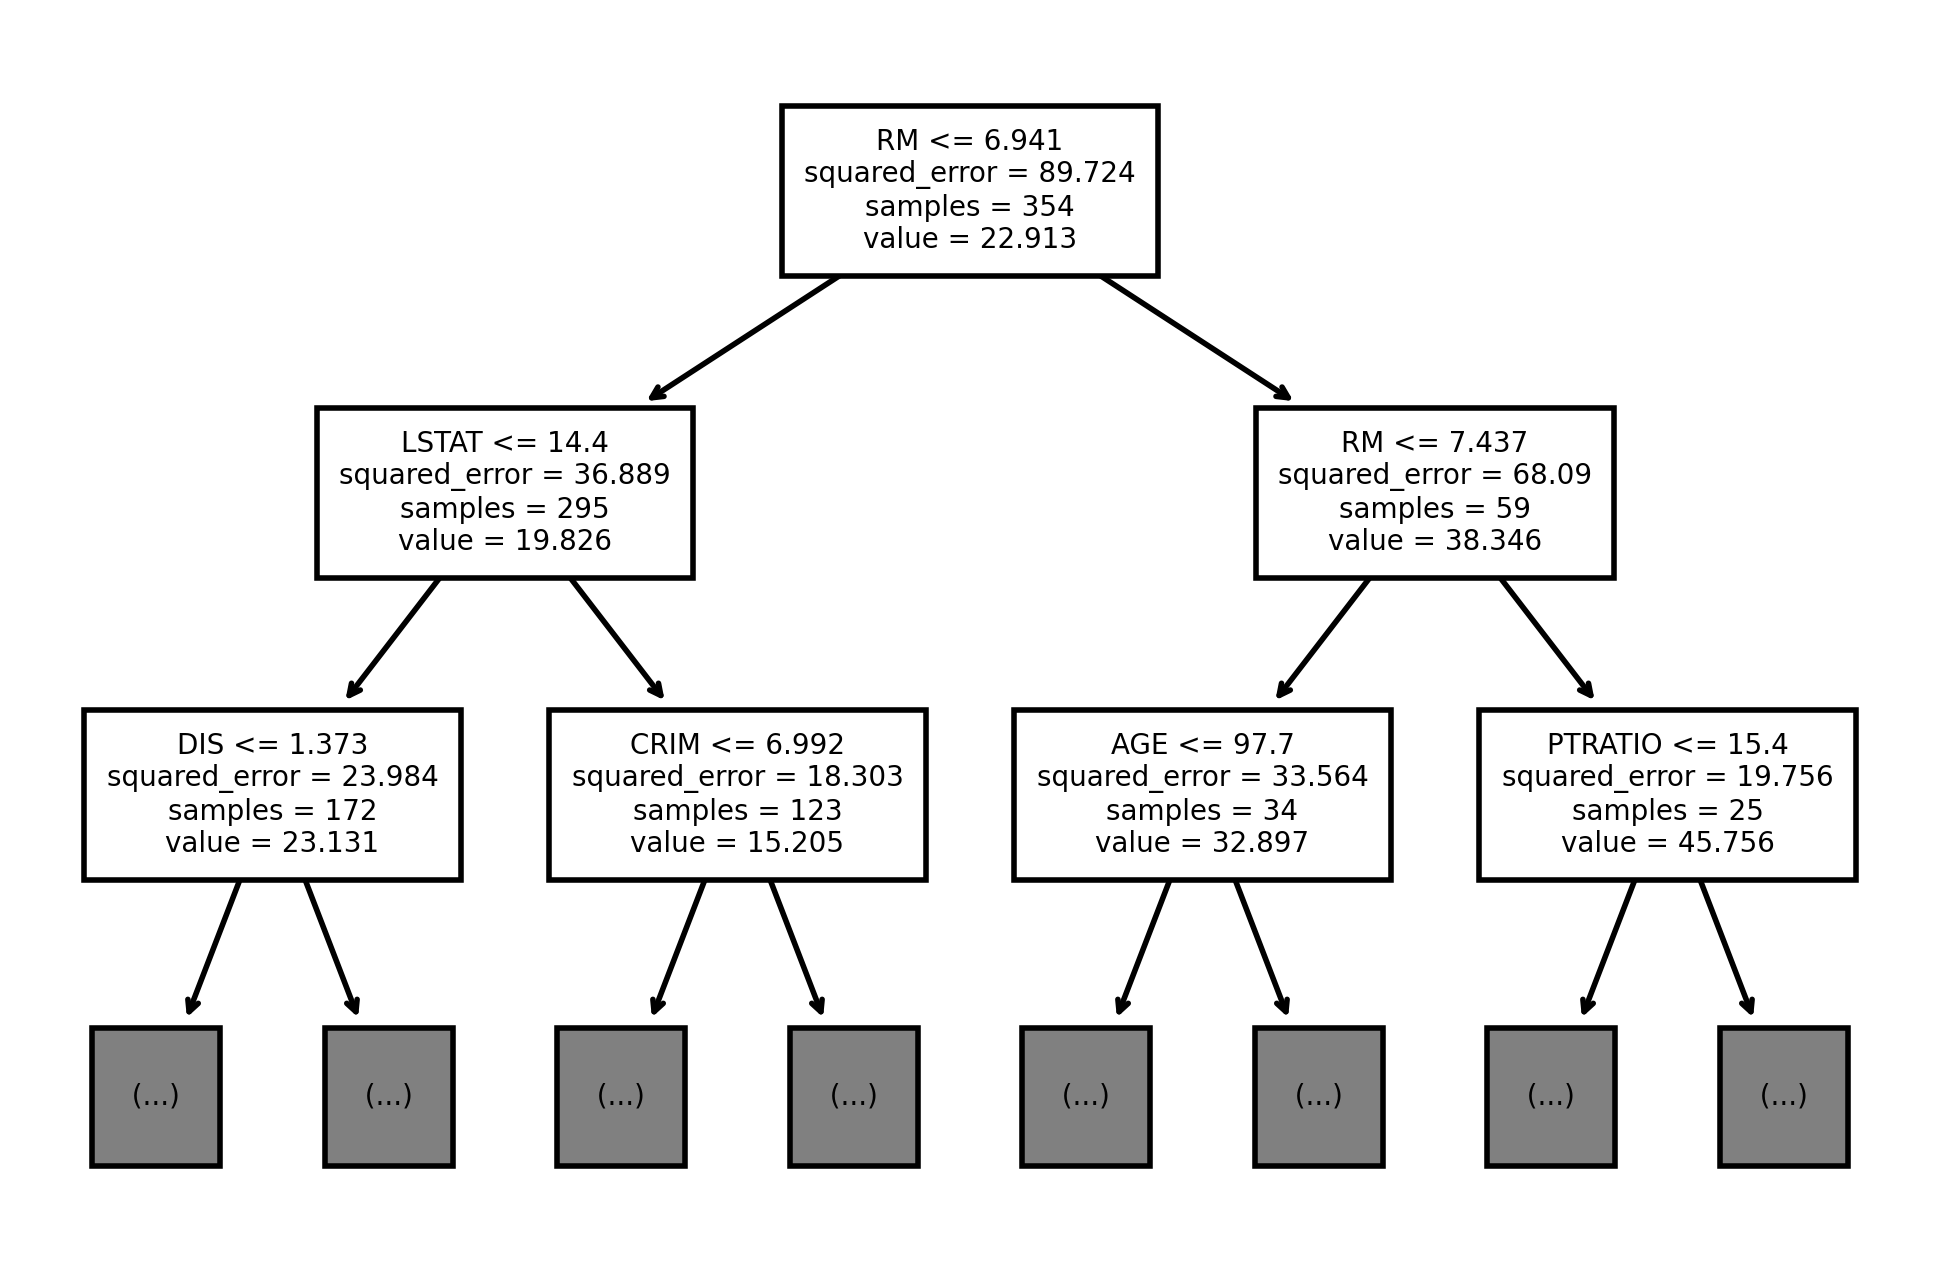

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(dpi=400) 
tree.plot_tree(model, max_depth=2, fontsize=5, feature_names=df.columns[:-1])
plt.show()

테스트셋 정확도를 살펴봅시다

In [24]:
y_test_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'test MSE: {mse_test:.2f}, test MAE: {mae_test:.2f}')

test MSE: 25.43, test MAE: 2.97


앞에서 만든 딥러닝 모델과 유사한 수준의 정확도가 나왔습니다. 


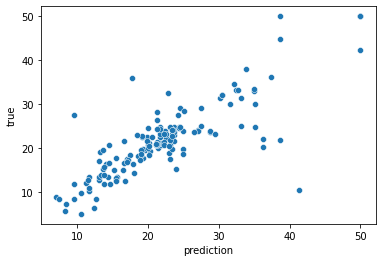

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test_pred, y=y_test)  # 출력 shape을 고려하여 연산

plt.xlabel('prediction') # y축 제목
plt.ylabel('true') # x축 제목
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


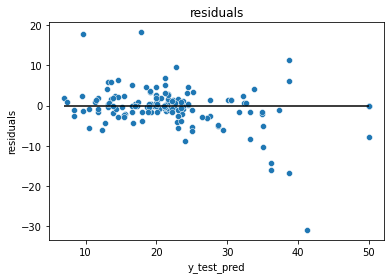

In [29]:
sns.scatterplot(y_test_pred, y_test-y_test_pred)
plt.title('residuals') # 타이틀
plt.xlabel('y_test_pred') # y축 제목
plt.ylabel('residuals') # x축 제목
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max())  # 수평선 그리기
plt.show()

이번에는 여러개의 decision tree를 사용하는 random forest 모델을 만들어보겠습니다. 

여러개의 decision tree 모델을 만들어 사용하므로 안전성을 개선할 수 있습니다.

In [37]:
from sklearn.ensemble import RandomForestRegressor  # randomforest regressor 불러오기

model2 = RandomForestRegressor(random_state=0)  # 인스턴스 만들기

In [38]:
model2 = model2.fit(x_train, y_train)

In [39]:
y_test_pred = model2.predict(x_test)

결과를 확인해봅시다

MAE 값이 매우 낮게 나왔습니다

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'test MSE: {mse_test:.2f}, test MAE: {mae_test:.2f}')

test MSE: 11.29, test MAE: 2.20


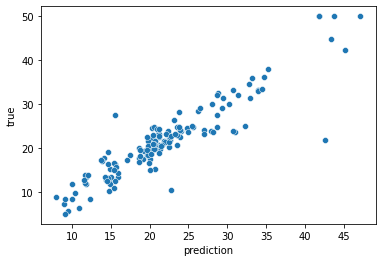

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test_pred, y=y_test)  # 출력 shape을 고려하여 연산

plt.xlabel('prediction') # y축 제목
plt.ylabel('true') # x축 제목
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


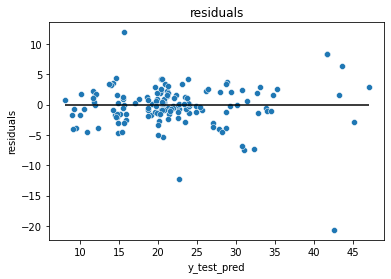

In [42]:
sns.scatterplot(y_test_pred, y_test-y_test_pred)
plt.title('residuals') # 타이틀
plt.xlabel('y_test_pred') # y축 제목
plt.ylabel('residuals') # x축 제목
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max())  # 수평선 그리기
plt.show()